In [22]:
import os
import pywt
import torch
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [23]:
def set_seed(seed: int = 42):
    random.seed(seed)                          # Python built-in random
    np.random.seed(seed)                       # NumPy random
    torch.manual_seed(seed)                    # CPU random seed
    torch.cuda.manual_seed(seed)               # GPU random seed (if used)
    torch.cuda.manual_seed_all(seed)           # All GPUs (if multiple GPUs)

    # Ensure deterministic behavior
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    # Optional: for hash-based operations
    os.environ['PYTHONHASHSEED'] = str(seed)

In [34]:
# read data
folder = 'public/simple/'
path = f'{folder}wavelets_multi_5_coif4.pkl'

with open(path, 'rb') as f:
    attributions = pickle.load(f)
print(f"Attributions loaded from {path}")

Attributions loaded from public/simple/wavelets_multi_5_coif4.pkl


In [35]:
# print the type of attributions[key_]
print(attributions.keys())

dict_keys(['deletion', 'insertion', 'predictions', 'labels', 'wavelet_coif5_5_128', 'filtermasks_wavelet_coif5_5_128', 'complexities', 'grad_complexities', 'wavelet_coif4_5_128', 'filtermasks_wavelet_coif4_5_128'])


In [26]:
key_ = 'wavelet_db1_5_128'
print(type(attributions[key_]))
print(len(attributions[key_]))
print(len(attributions[key_][0]))
print(len(attributions[key_][0][0]))
print(len(attributions[key_][0][0][0]))
print(len(attributions[key_][0][0][0][0]))

<class 'list'>
79
128
1
1000
6


In [27]:
key_2 = f'filtermasks_{key_}'
print(type(attributions[key_2]))
print(len(attributions[key_2]))
print(len(attributions[key_2][0]))
print(len(attributions[key_2][0][0]))
print(len(attributions[key_2][0][0][0]))

<class 'list'>
79
128
1000
6


In [36]:
set_seed(42)

# stores the accuracy, mean true class prob and cross-entropy loss throughout the quantiles
for k in attributions['insertion'].keys():
    print(k)
    for val in range(len(attributions['insertion'][k])):
        print(attributions['insertion'][k][val])

wavelet_coif5_5_128
[0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.5000000552177429, 0.9999339929580688, 0.999984160900116, 0.9999863080024719, 0.9999889740943909, 0.9999910425186157, 0.9999922189712525, 0.9999918223381042, 0.9999929705619812, 0.9999930594444275, 0.9999946762084961, 0.9999961120605468, 0.9999958505630493, 0.9999947689056397, 0.9999949834823608, 0.9999956961631775, 0.9999969856262207, 0.9999976189613342, 0.9999980043411255, 0.9999982873916626, 0.9999983865737915]
[113.65010225772858, 0.0025941110156963987, 0.000621207489302833, 0.000537159623036132, 0.00043228507570347574, 0.0003510449319037434, 0.00030475722110168135, 0.0003208521345641202, 0.00027586442024585267, 0.00027240450140197936, 0.00020882609396721818, 0.0001524484152923833, 0.0001629428744820416, 0.0002050285204688862, 0.00019653586684853508, 0.00016880345594927348, 0.0001182735867644169, 9.365713312092794e-05, 7.842120263035213e-05, 6.720372340396

In [28]:
set_seed(42)

# stores the accuracy, mean true class prob and cross-entropy loss throughout the quantiles
for k in attributions['insertion'].keys():
    print(k)
    for val in range(len(attributions['insertion'][k])):
        print(attributions['insertion'][k][val])

wavelet_sym4_5_128
[0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.5000000552177429, 0.9976713298797607, 0.9995490670204162, 0.9996906483650208, 0.9997317623138428, 0.9997894620895386, 0.9998417896270752, 0.9998782145500184, 0.9998743886947632, 0.9998867710113526, 0.9998947402954101, 0.9998993545532227, 0.9998953378677368, 0.999906290435791, 0.9999166261672974, 0.9999051309585572, 0.9998929410934448, 0.9998907941818237, 0.9999109339714051, 0.999921861743927, 0.999933158493042]
[113.65010225772858, 0.09467974412837066, 0.017925555424881168, 0.012259036717296112, 0.010632889981934568, 0.008344269434019225, 0.006257394841668429, 0.004800025904842187, 0.004936646906571696, 0.004453518411537516, 0.004138135769608198, 0.003958513752877479, 0.004108494311367394, 0.00367611727961048, 0.003268007322731137, 0.0037175346942603937, 0.004195570571937424, 0.004278865080777905, 0.003489521703158971, 0.0030617060938311624, 0.0026186466398030

In [30]:
print(attributions['complexities'])

{'wavelet_sym4_5_128': [np.float64(5.368344906251966)], 'wavelet_db4_5_128': [np.float64(5.374031480357627)], 'wavelet_db1_5_128': [np.float64(5.568621365578982)]}


In [37]:
print(attributions['complexities'])

{'wavelet_coif5_5_128': [np.float64(5.281910162173065)], 'wavelet_coif4_5_128': [np.float64(5.292116016596073)]}


In [31]:
def plot_scaleogram_wav_heatmap(signal, attribution, label:int, fs=100, wavelet='db1'):
    # print(attribution.shape)

    # Compute frequency bands
    freq_bands = [fs /  (2 ** (j + 1)) for j in range(len(attribution[0]))]   # bands
    freq_bands.append(0)                                        # lowest frequency
    freq_bands = freq_bands[::-1]                               # reverse the order
    # print(freq_bands)

    time = np.linspace(0, signal / fs, signal)
    

    # normalize attribution scores to [0,1]
    attribution = np.abs(attribution)
    attr_norm = (attribution - attribution.min()) / (attribution.max() - attribution.min() + 1e-10)

    # Create a 2D grid for heatmap
    time_grid, freq_grid = np.meshgrid(time, freq_bands)
    # make attr x one dim smaller
    attr_norm = attr_norm[1:,:]

    # Plot the scaleogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(time_grid, freq_grid, attr_norm.T, shading='auto', cmap='Greens')
    plt.colorbar(label="Normalized Attribution Score")
    plt.title(f'Attributions of class {label} learned through wavelet {wavelet}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.show()

wavelet_coif5_5_128


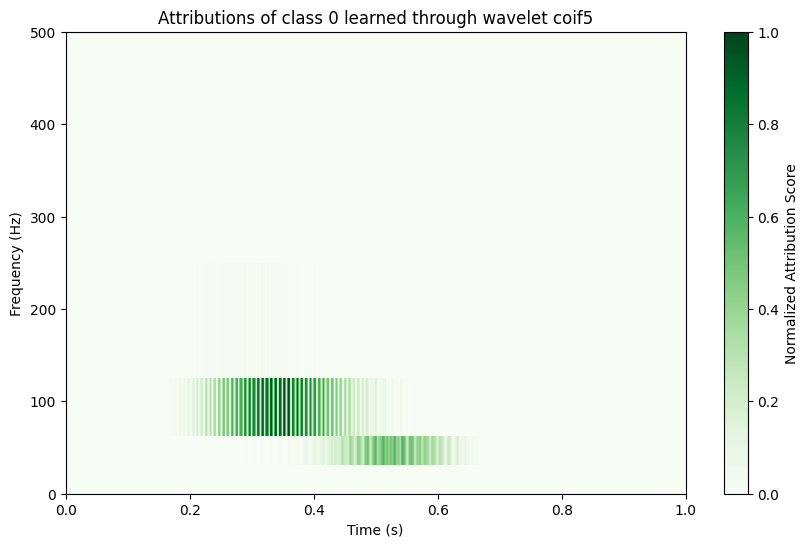

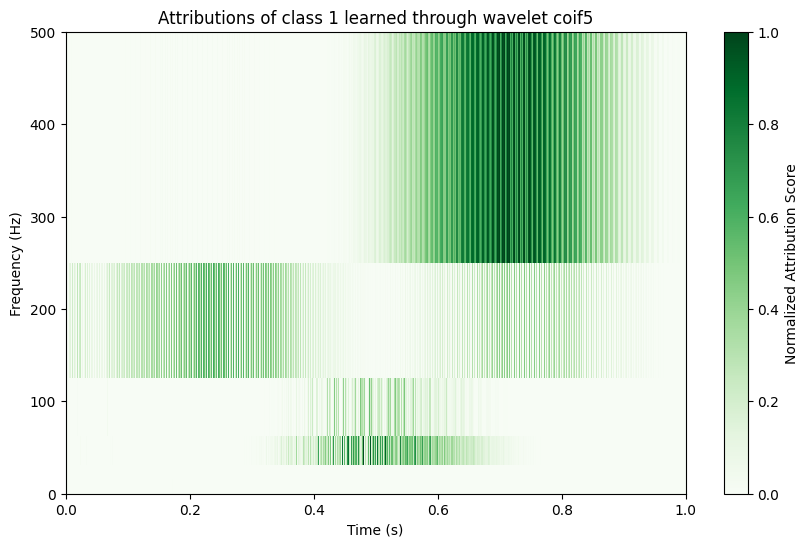

Count 0: 5000, Count 1: 5000
wavelet_coif4_5_128


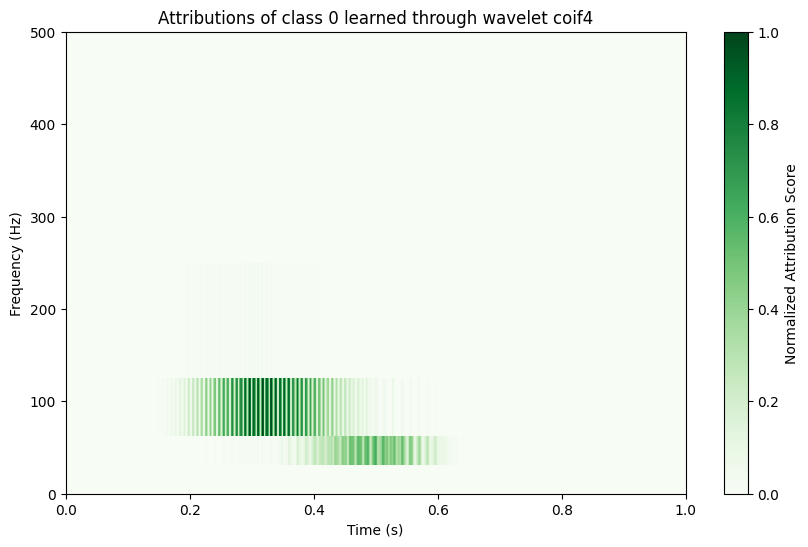

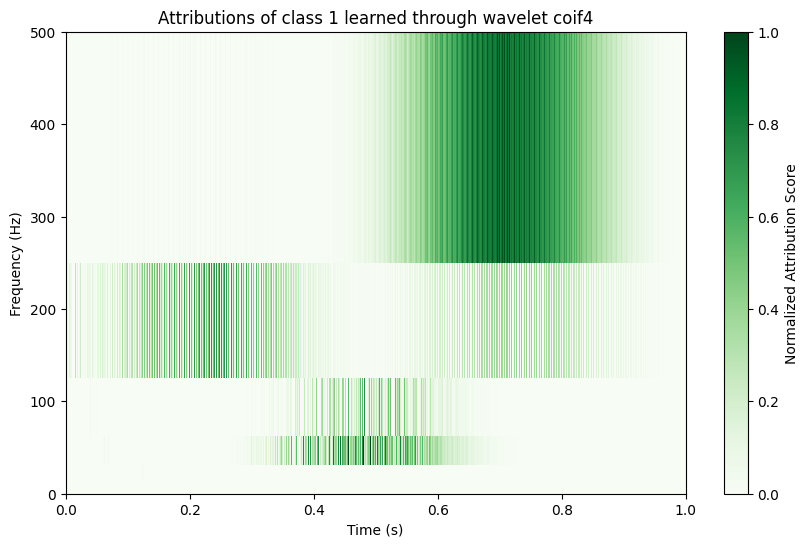

Count 0: 5000, Count 1: 5000


In [38]:
fs = 1000

for key in attributions['insertion'].keys():
    counts_0 = 0
    counts_1 = 0
    print(key)

    method, wavelet, max_level, batch_size = key.split('_')
    max_level = int(max_level)

    key_ = f'filtermasks_{key}'

    masks_0 = np.zeros_like(attributions[key_][0][0])
    masks_1 = np.zeros_like(attributions[key_][0][0])

    index = 0

    for i in range(len(attributions[key_])):
        for j in range(len(attributions[key_][i])):
            # print(index)
            if attributions['labels'][index] == 0:
                counts_0 += 1
                masks_0 += attributions[key_][i][j]
            else:
                counts_1 += 1
                masks_1 += attributions[key_][i][j]

            index += 1

    masks_0 /= counts_0
    masks_1 /= counts_1

    plot_scaleogram_wav_heatmap(fs, masks_0, label=0, fs=fs, wavelet=wavelet)
    plot_scaleogram_wav_heatmap(fs, masks_1, label=1, fs=fs, wavelet=wavelet)

    print(f"Count 0: {counts_0}, Count 1: {counts_1}")



wavelet_sym4_5_128


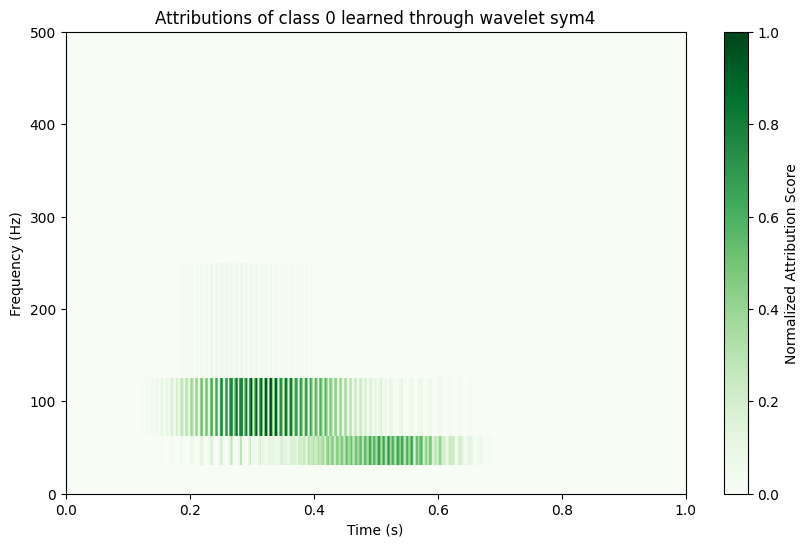

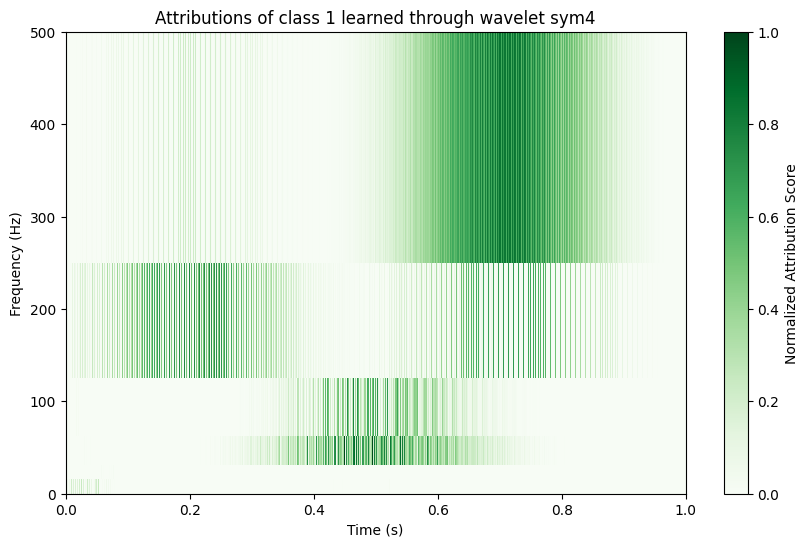

Count 0: 5000, Count 1: 5000
wavelet_db4_5_128


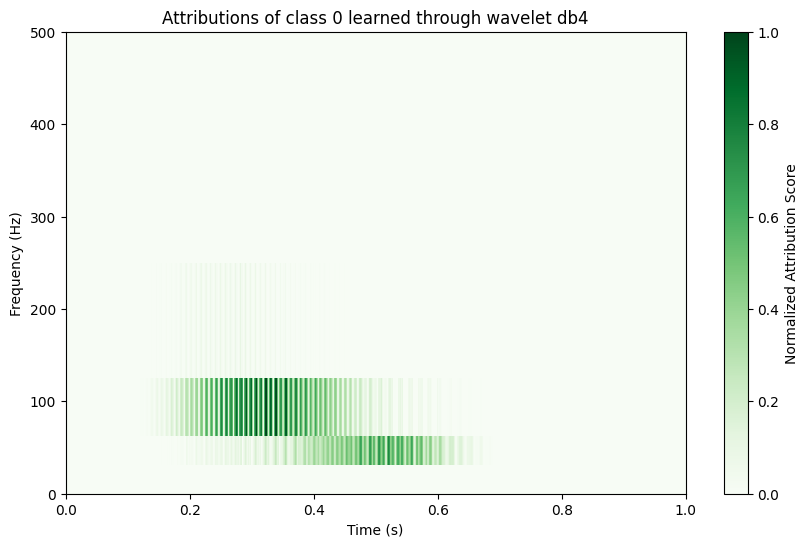

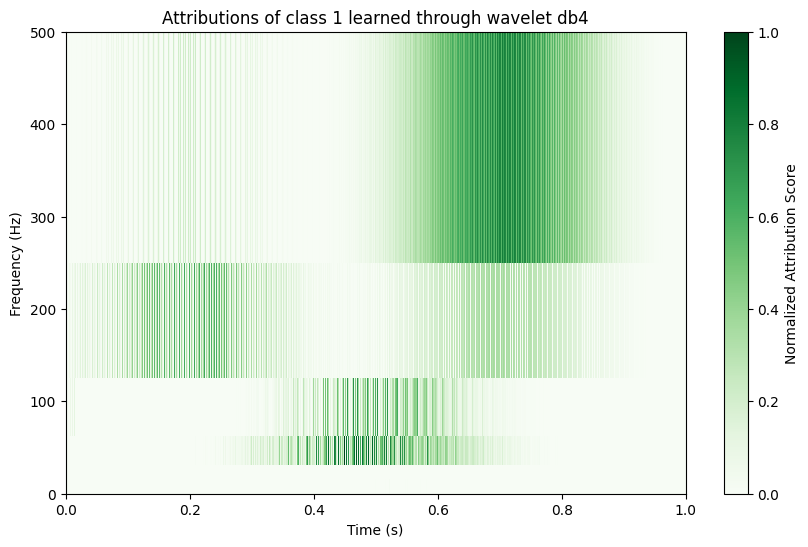

Count 0: 5000, Count 1: 5000
wavelet_db1_5_128


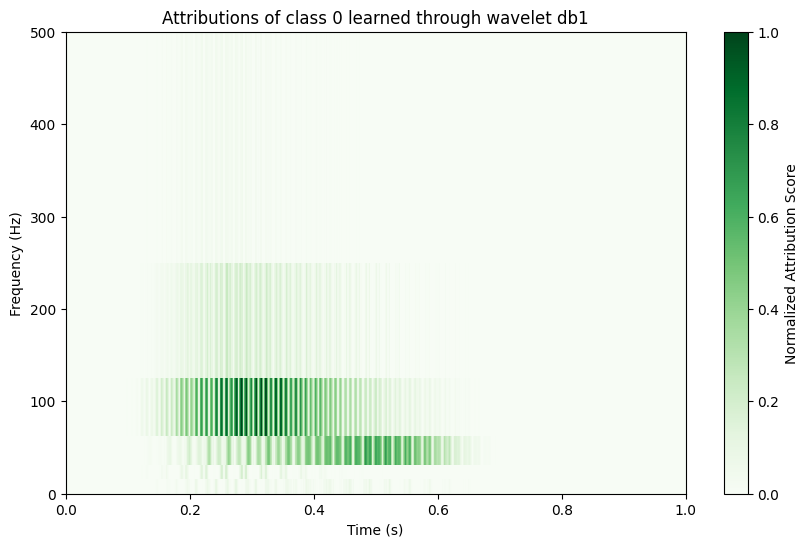

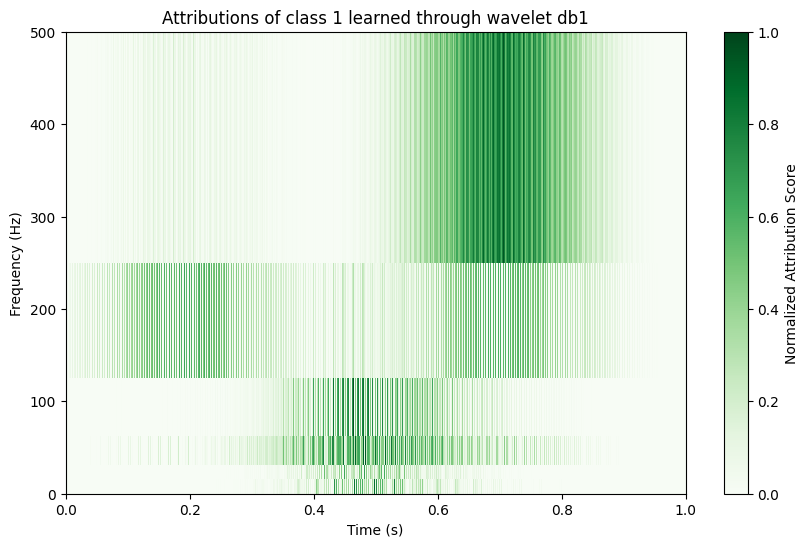

Count 0: 5000, Count 1: 5000


In [33]:
fs = 1000

for key in attributions['insertion'].keys():
    counts_0 = 0
    counts_1 = 0
    print(key)

    method, wavelet, max_level, batch_size = key.split('_')
    max_level = int(max_level)

    key_ = f'filtermasks_{key}'

    masks_0 = np.zeros_like(attributions[key_][0][0])
    masks_1 = np.zeros_like(attributions[key_][0][0])

    index = 0

    for i in range(len(attributions[key_])):
        for j in range(len(attributions[key_][i])):
            # print(index)
            if attributions['labels'][index] == 0:
                counts_0 += 1
                masks_0 += attributions[key_][i][j]
            else:
                counts_1 += 1
                masks_1 += attributions[key_][i][j]

            index += 1

    masks_0 /= counts_0
    masks_1 /= counts_1

    plot_scaleogram_wav_heatmap(fs, masks_0, label=0, fs=fs, wavelet=wavelet)
    plot_scaleogram_wav_heatmap(fs, masks_1, label=1, fs=fs, wavelet=wavelet)

    print(f"Count 0: {counts_0}, Count 1: {counts_1}")



In [13]:
def compute_entropy_sample(attribution, epsilon=1e-10):
    abs_attr = np.abs(attribution)
    sum_attr = np.sum(abs_attr) + epsilon
    prob_dist = abs_attr / sum_attr
    entropy = -np.sum(prob_dist * np.log(prob_dist + epsilon))
    return entropy

In [14]:
# Compute the entropy-based complexity
complexity_scores = []

for i in range(len(attributions[key_])):
    attr = np.reshape(attributions[key][i], (attributions[key][i].shape[0], -1))
    scores = []
    # print(attributions[key_][i].shape)
    for sample in attr:
        sample = sample.detach().cpu().numpy()
        c = compute_entropy_sample(sample)
        c = np.nan_to_num(c)
        scores.append(c)
    complexity_scores += scores

# compute the mean
print(f"key: {key}")
mean_complexity = np.mean(complexity_scores)
print("Complexity Scores:")
print(mean_complexity)

key: wavelet_coif5_5_128
Complexity Scores:
5.28191


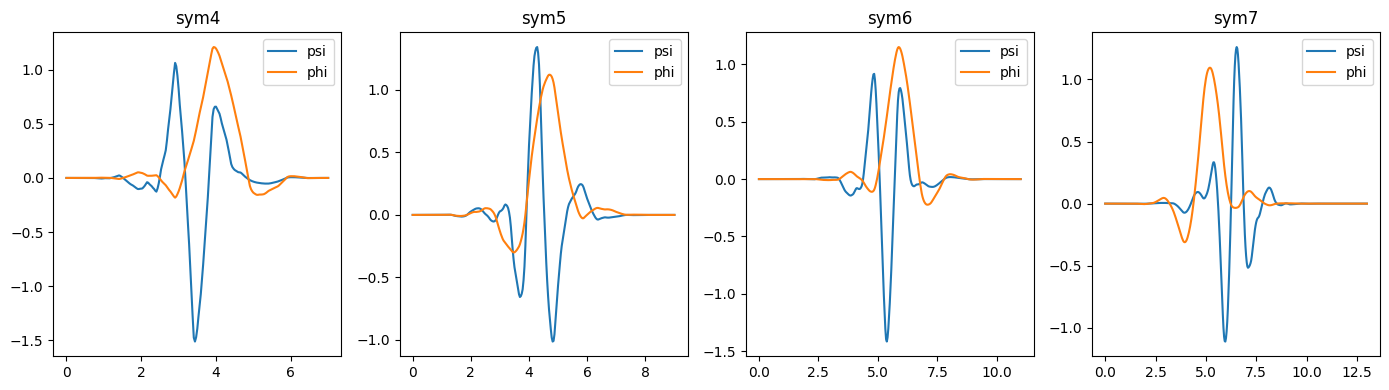

In [20]:
import pywt
import matplotlib.pyplot as plt

# plot the db family wavelets from db1 to db4
def plot_wavelet_families(wavelet_families=['db'], wavelet_orders=None):
    plt.figure(figsize=(14, 4))

    for family in wavelet_families:
        for order in wavelet_orders:
            wavelet_name = f'{family}{order}'
            wavelet = pywt.Wavelet(wavelet_name)
            phi, psi, x = wavelet.wavefun(level=5)

            plt.subplot(len(wavelet_families), len(wavelet_orders), 
                        wavelet_families.index(family) * len(wavelet_orders) + (order) - 3)
            plt.plot(x, psi, label='psi')
            plt.plot(x, phi, label='phi')
            plt.title(f'{wavelet_name}')
            # plt.xlabel(f'{wavelet_name}')
            plt.legend()
            if order == 1:
                plt.ylabel('Amplitude')


    plt.tight_layout()
    plt.show()

# Call the function to plot wavelet families
plot_wavelet_families(['sym'], [4, 5, 6, 7])

In [30]:
print(pywt.dwt_max_level(1000, 'coif5'))

5


['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

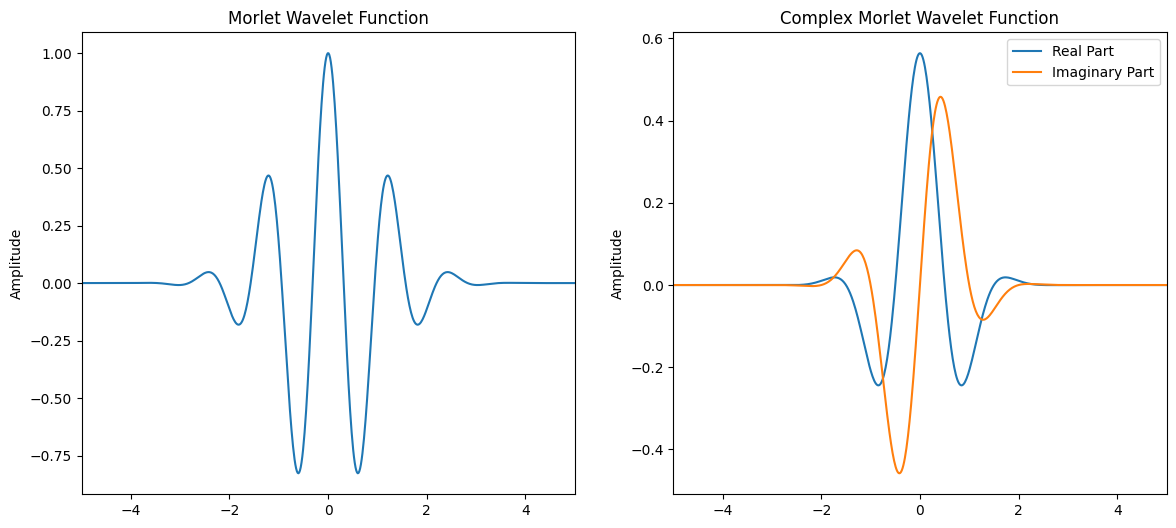

In [77]:
import pywt


print(pywt.wavelist())

# plot the morlet wavelet
morlet_wavelet = pywt.ContinuousWavelet('morl')
print(morlet_wavelet)

phi, x = morlet_wavelet.wavefun(level=10)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, phi, label='Morlet Wavelet Function')
plt.title('Morlet Wavelet Function')
plt.ylabel('Amplitude')
plt.xlim([-5, 5])

# plot the complex morlet wavelet
complex_morlet_wavelet = pywt.ContinuousWavelet('cmor1.0-0.5')
print(complex_morlet_wavelet)
phi, x = complex_morlet_wavelet.wavefun(level=10)
plt.subplot(1, 2, 2)
plt.plot(x, phi.real, label='Real Part')
plt.plot(x, phi.imag, label='Imaginary Part')
plt.title('Complex Morlet Wavelet Function')
plt.ylabel('Amplitude')
plt.xlim([-5, 5])
plt.legend()
plt.show()

